<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/model-building/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv('/content/combined_dataset_fs_2.csv')
df

,Unnamed: 0,KRFP17,KRFP1146,KRFP1157,KRFP2667,KRFP2986,KRFP3058,KRFP3180,KRFP3360,KRFP3395,...,BCUT2D_CHGHI_1.0,BCUT2D_CHGLO_1.0,BCUT2D_MRHI_2.0,Chi4n_0,PEOE_VSA6_0,SlogP_VSA11_0,RingCount_0,fr_NH0_0,fr_aniline_0,fr_aryl_methyl_0
0,0,1,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
1,1,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
2,2,1,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
3,3,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
4,4,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,1,0,1,1,1
1813,1813,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,1,0,1,1,1
1814,1814,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1
1815,1815,0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,1,1,1,0,1


In [ ]:
df = df.drop('Unnamed: 0', axis=1, errors='ignore')



In [ ]:
X = df.drop(["bioactivity_class"], axis=1)
Y = df.bioactivity_class

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)
clf_report = classification_report(Y_test, y_pred, output_dict=True)

In [ ]:
print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Classification Report:\n{classification_report(Y_test, y_pred)}")

Random Forest Evaluation Metrics:
Accuracy: 0.8864
AUC: 0.9543
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       249
           1       0.91      0.88      0.89       297

    accuracy                           0.89       546
   macro avg       0.89      0.89      0.89       546
weighted avg       0.89      0.89      0.89       546



In [ ]:
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

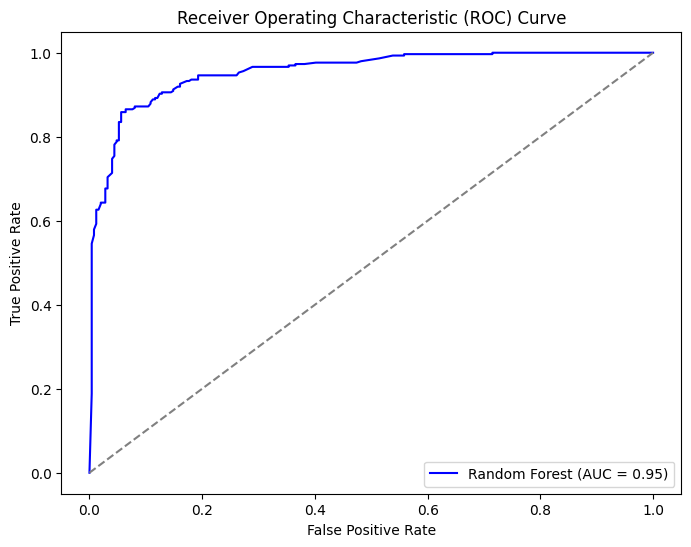

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, mean_absolute_error, cohen_kappa_score

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[222  27]
 [ 35 262]]


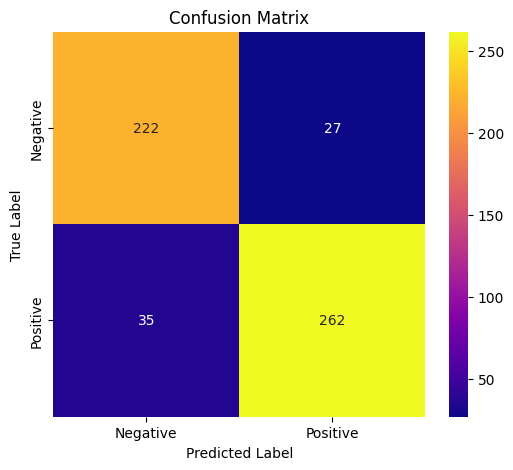

In [27]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="plasma", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f"\nSensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.8822


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.1136


In [ ]:
# Cohen's Kappa Score
kappa = cohen_kappa_score(Y_test, y_pred)
print(f"\nCohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.7717


<ipython-input-26-043c31e2bada>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="coolwarm")


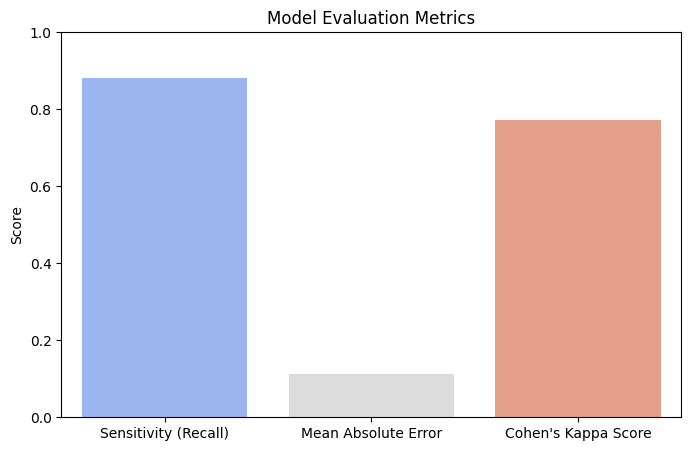

In [ ]:
# Plot Sensitivity, MAE, and Kappa Score
metrics = ["Sensitivity (Recall)", "Mean Absolute Error", "Cohen's Kappa Score"]
values = [sensitivity, mae, kappa]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="coolwarm")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)  # Since metrics are between 0 and 1
plt.show()